### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Unimos todas las bases de datos
tienda_total = pd.concat([tienda, tienda2, tienda3, tienda4])

# Calculamos la facturación total (Precio + Costo de envío)
tienda_total['Facturación'] = tienda_total['Precio'] + tienda_total['Costo de envío']
facturacion_total = tienda_total['Facturación'].sum()

print(f"Facturación total: {facturacion_total:,.2f}")

Facturación total: 4,638,316,200.00


# 2. Ventas por categoría

Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Facturación, dtype: float64


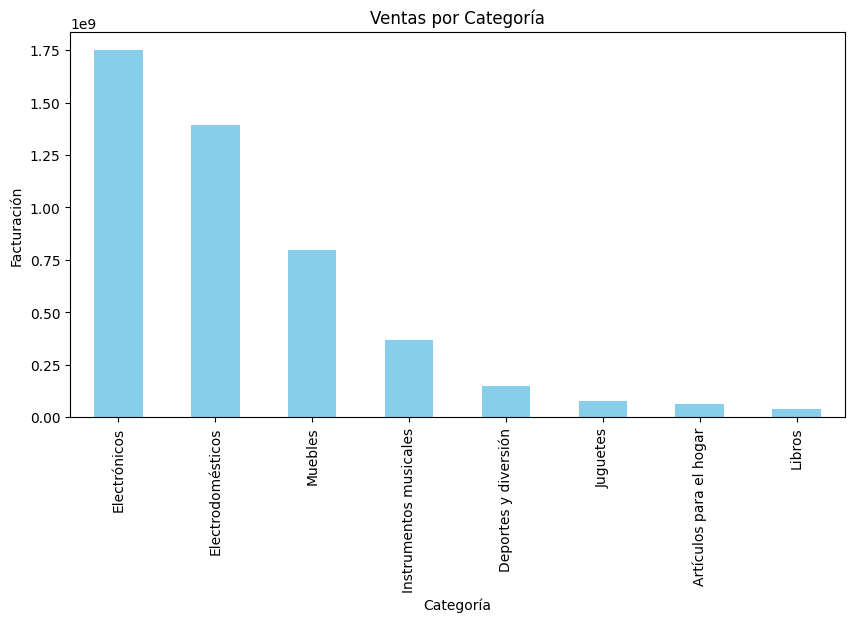

In [3]:
ventas_categoria = tienda_total.groupby("Categoría del Producto")['Facturación'].sum().sort_values(ascending=False)
print(ventas_categoria)

# Gráfica
import matplotlib.pyplot as plt

ventas_categoria.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Ventas por Categoría")
plt.ylabel("Facturación")
plt.xlabel("Categoría")
plt.show()

# 3. Calificación promedio de la tienda


In [4]:
calificacion_promedio = tienda_total['Calificación'].mean()
print(f"Calificación promedio: {calificacion_promedio:.2f}")

Calificación promedio: 4.01


# 4. Productos más y menos vendidos

In [5]:
productos_vendidos = tienda_total['Producto'].value_counts()
print("Producto más vendido:", productos_vendidos.idxmax(), "-", productos_vendidos.max(), "ventas")
print("Producto menos vendido:", productos_vendidos.idxmin(), "-", productos_vendidos.min(), "ventas")

Producto más vendido: Mesa de noche - 210 ventas
Producto menos vendido: Celular ABXY - 157 ventas


# 5. Envío promedio por tienda


 Envío promedio por tienda:
 Lugar de Compra
Soacha           34768.421053
Inírida          30557.142857
Cúcuta           28597.311828
Pasto            27801.063830
Neiva            27710.000000
Bucaramanga      26790.055249
Cali             26726.812314
Leticia          25317.605634
Medellín         25282.022472
Villavicencio    25100.000000
Manizales        24948.780488
Bogotá           24532.082171
Riohacha         24127.607362
Pereira          23211.411992
Armenia          22867.857143
Barranquilla     22692.258065
Cartagena        22638.429752
Valledupar       22021.428571
Santa Marta      18752.317881
Name: Costo de envío, dtype: float64


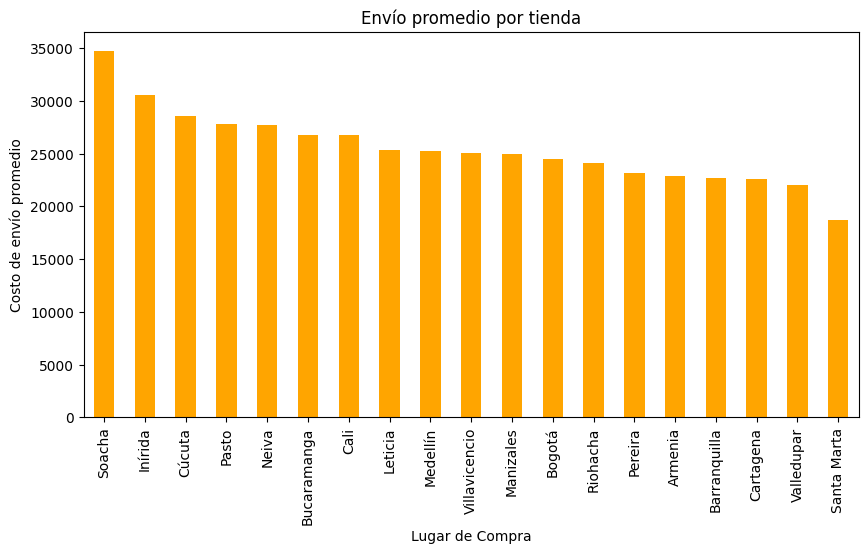

In [9]:
# ===== 5. Envío promedio por tienda =====
envio_promedio = tienda_total.groupby("Lugar de Compra")['Costo de envío'].mean().sort_values(ascending=False)
print("\n Envío promedio por tienda:\n", envio_promedio)

envio_promedio.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Envío promedio por tienda")
plt.ylabel("Costo de envío promedio")
plt.xlabel("Lugar de Compra")
plt.show()